In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [3]:
A = pd.read_csv(r'C:\Users\Vedika\Downloads\Admission_Predict.csv')

In [4]:
A.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
A.drop('Serial No.', axis = 1, inplace = True)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
A.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
A['Chance of Admit '] = A['Chance of Admit '].apply(lambda x: 1 if x >=0.50 else 0 )

In [16]:
A['Chance of Admit '].value_counts()

1    367
0     33
Name: Chance of Admit , dtype: int64

In [20]:
x = A.drop('Chance of Admit ', axis = 1)
y = A['Chance of Admit ']

In [21]:
#splitting data 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [22]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Chance of Admit , dtype: int64

In [25]:
print("Shape of x_train :", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train : (320, 7)
Shape of y_train :  (320,)
Shape of x_test :  (80, 7)
Shape of y_test:  (80,)


In [27]:
#creating model 
from sklearn.svm import SVC
clf1 = SVC(kernel='linear')
clf1.fit(x_train,y_train)
y1_pred = clf1.predict(x_test)

In [29]:
clf2 = SVC(kernel='poly')
clf2.fit(x_train,y_train)
y2_pred = clf2.predict(x_test)

In [30]:
clf3 = SVC(kernel='rbf')
clf3.fit(x_train,y_train)
y3_pred = clf3.predict(x_test)

In [31]:
clf4 = SVC(kernel='sigmoid')
clf4.fit(x_train,y_train)
y4_pred = clf4.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
print("accuracy score of linear kernel: ", accuracy_score(y_test,y1_pred))

accuracy score of linear kernel:  0.95


In [42]:
print("accuracy score of poy kernel: ", accuracy_score(y_test,y2_pred))

accuracy score of poy kernel:  0.925


In [43]:
print("accuracy score of rbf kernel: ", accuracy_score(y_test,y3_pred))

accuracy score of rbf kernel:  0.925


In [44]:
print("accuracy score of sigmoid kernel: ", accuracy_score(y_test,y4_pred))

accuracy score of sigmoid kernel:  0.925


<AxesSubplot:>

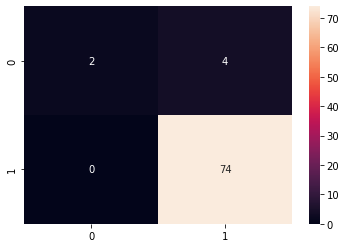

In [45]:
#visualising linear model
cm = confusion_matrix(y_test,y1_pred)
sns.heatmap(cm, annot=True)